# Install and load necesary packages

In [2]:
# Please don't change this cell

import pandas as pd
import numpy as np  

import warnings
warnings.filterwarnings("ignore")


## Load the dataset using pandas

In [4]:
# Please don't change this cell
df = pd.read_csv('ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], sep='\t')

df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Split dataset


## Randomly select one rating from each user as test set

In [7]:
# please do not change this cell

from sklearn.model_selection import train_test_split

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_items) + ' items')

train_df, test_df = train_test_split(df, test_size=0.2, random_state = 10)
train_df, test_df

# Training Dataset
train_ds = np.zeros((n_users, n_items))
item_popularity = np.zeros(n_items)
for row in train_df.itertuples():
    train_ds[row[1]-1, row[2]-1] = row[3]
    item_popularity[row[2]-1] =  item_popularity[row[2]-1] + 1
#train_ds = pd.DataFrame(train_ds)

# Testing Dataset
testsize = 0
test_ds = np.zeros((n_users, n_items))
for row in test_df.itertuples():
    if item_popularity[row[2]-1] > 30:
        test_ds[row[1]-1, row[2]-1] = row[3]
        testsize = testsize + 1
#test_ds = pd.DataFrame(test_ds)

print("Construct the rating matrix based on train_df:")
print(train_ds)

print("Construct the rating matrix based on test_df:")
print(test_ds)

print("Testsize = " + str(testsize))

943 users
1682 items
Construct the rating matrix based on train_df:
[[0. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Construct the rating matrix based on test_df:
[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testsize = 17678


# MAE and RMSE Utils

In [9]:
# Please don't change this cell
# you can use this devaluate Utils here, and you can also implement your own MAE and RMSE calculation. 

EPSILON = 1e-9

def evaluate(test_ds, predicted_ds):
    '''
    Function for evaluating on MAE and RMSE
    '''
    # MAE
    mask_test_ds = test_ds > 0
    MAE = np.sum(np.abs(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32))

    # RMSE
    RMSE = np.sqrt(np.sum(np.square(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32)))

    return MAE, RMSE

# Your Solution for Method 1

In [11]:
# Write your code here for Method 1
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution1 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution1 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.

# Creating two user-item matrices with initial values zero 
ratings = np.zeros((n_users, n_items)) # To store the actual rating provided by the user
ratings_binary = np.zeros((n_users, n_items)) # Binary matrix to record if the item has been rated or not

# The indices have been subtracted from 1 for zero based indexing 
for row in train_df.itertuples(): # Row representes each item in the row 
    # Row 1 is the user_id, Row 2 is the item_id and Row 3 is the rating given by the user to that item  
    ratings[row[1]-1,row[2]-1] = row[3] # Storing the rating given by the user to ratings 
    ratings_binary[row[1]-1,row[2]-1] = 1 # Storing the value 1 against each rating that the user has provided

# Computing Average Rating
user_ratings = ratings.sum(axis = 1) # Taking sum of all rows 
number_of_ratings = ratings_binary.sum(axis = 1) # Count of the users who have rated 
Average_Rating = user_ratings/number_of_ratings # Computing average rating 

# Replicating user's average rating across all items for prediction  
user_avg_predictions = np.tile(Average_Rating.reshape(-1, 1), ratings.shape[1])

# Evaluation
MAE_solution1, RMSE_solution1 = evaluate(test_ds, user_avg_predictions)

In [12]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution1, RMSE_solution1))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8258905090105331, RMSE: 1.031143070595138


# Your Solution for Method 2

In [14]:
# Write your code here for Method 2
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution2 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution2 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.

# Similar to method 1, creating two user-item matrices 
ratings = np.zeros((n_users, n_items))        
ratings_binary = np.zeros((n_users, n_items)) 

# The indices have been subtracted from 1 for zero based indexing 
for row in train_df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
    ratings_binary[row[1]-1, row[2]-1] = 1

item_ratings = ratings.sum(axis = 0)  # The axis is defined as 0, to count the items which has been rated, not the user              
item_rating_count = ratings_binary.sum(axis = 0) # Count of how many users rated each item     
Average_Rating = item_ratings / item_rating_count  # Calculating average rating across each item

# Computing the predictions 
item_predictions = np.tile(Average_Rating, (ratings.shape[0], 1))

# Evaluation
MAE_solution2, RMSE_solution2 = evaluate(test_ds, item_predictions)


In [15]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution2, RMSE_solution2))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7961203950990416, RMSE: 1.0013142101585724


# Your Solution for Method 3

In [17]:
# Write your code here for Method 3
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution3 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution3 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.

ratings_binary = np.zeros((n_users, n_items))
ratings = np.zeros((n_users, n_items))

for row in train_df.itertuples(): 
    ratings_binary[row[1]-1,row[2]-1] = 1 # Checking whether the item has been rated 
    ratings[row[1]-1,row[2]-1] = row[3]

user_similarity = np.zeros((n_users, n_users))

ep = 1e-9

for i in range(n_users):
    for j in range(n_users):

        if j > i: # To avoid redundant comparisons 
            i_common_rating = []
            j_common_rating = []
            centre_i = []
            centre_j = []
            count_corrated_items = 0 # Initializing the corrated items as 0 initially
            
            for item in range(n_items): 
                if ratings_binary[i,item]: # If user 1 and user 2 have rated the item
                    if ratings_binary[j, item]:
                        i_common_rating.append(ratings[i, item])
                        j_common_rating.append(ratings[j, item])
                        count_corrated_items += 1
                        
            if count_corrated_items == 0: # If there are no commonly rated items between the two users
                similarity = 0
                continue

            user_i_rating = np.mean(i_common_rating)
            user_j_rating = np.mean(j_common_rating)
            
            for r in i_common_rating:
                centre_i.append(r - user_i_rating)
            
            for r in j_common_rating:    
                centre_j.append(r - user_j_rating)
            
            similarity = np.dot(centre_i, centre_j) / (ep + np.sqrt(np.dot(centre_i, centre_i)) * np.sqrt(np.dot(centre_j, centre_j)))
            user_similarity[i, j] = similarity
            user_similarity[j, i] = similarity

# Predicting ratings through user similarity 
data_pre = pd.DataFrame(index=range(n_users), columns=range(n_items))
ratings_df = pd.DataFrame(ratings)

k_neighbour = [9,15,25,40, 45, 50]

for k in k_neighbour:
    for i in range(n_users):  # For each user
        for j in range(n_items):  # For each item

            if test_ds[i, j] == 0:
                continue  # Skip if not in test set

            if ratings_df.iloc[i, j] > 0:
                data_pre.iloc[i, j] = ratings_df.iloc[i, j]  # Use existing rating if available
                continue

            # Find users who rated item j
            mask_rated_users = ratings[:, j] > 0
            if np.sum(mask_rated_users) == 0:
                data_pre.iloc[i, j] = 3.0  # Fallback to global average
                continue

            sim_scores = user_similarity[i, mask_rated_users]  # Similarity between user i and others
            rated_scores = ratings[mask_rated_users, j]  # Ratings those users gave to item j

            if len(sim_scores) > k:
                top_k_idx = np.argsort(sim_scores)[-k:]
                sim_scores = sim_scores[top_k_idx]
                rated_scores = rated_scores[top_k_idx]

            if np.sum(np.abs(sim_scores)) == 0:
                user_rated = ratings[i, :] > 0
                if np.sum(user_rated) > 0:
                    data_pre.iloc[i, j] = np.mean(ratings[i, user_rated])
                else:
                    data_pre.iloc[i, j] = 3.0
            else:
                data_pre.iloc[i, j] = np.dot(sim_scores, rated_scores) / (np.sum(np.abs(sim_scores)) + ep)

    user_knn_pred = data_pre.fillna(0).values
    MAE, RMSE = evaluate(test_ds, user_knn_pred)
    if k == 25:
        MAE_solution3, RMSE_solution3 = MAE, RMSE
    print(f"k: {k}, MAE: {MAE}, RMSE: {RMSE}")

k: 9, MAE: 0.8119743880556275, RMSE: 1.0244540315614619
k: 15, MAE: 0.7970112239221583, RMSE: 1.0053207435568996
k: 25, MAE: 0.7887518967353208, RMSE: 0.9972146427260026
k: 40, MAE: 0.8319102617478967, RMSE: 1.07617568041587
k: 45, MAE: 0.8518197283440843, RMSE: 1.10808176886397
k: 50, MAE: 0.8705275549473561, RMSE: 1.1391539623658822


In [18]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution3, RMSE_solution3))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7887518967353208, RMSE: 0.9972146427260026


# Your Solution for Method 4

In [20]:
# Write your code here for Method 4
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution4 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution4 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation

# Create user-item rating matrix 
ratings = np.zeros((n_users, n_items))
ratings_binary = np.zeros((n_users, n_items))

for row in train_df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
    ratings_binary[row[1]-1, row[2]-1] = 1

ratings_df = pd.DataFrame(ratings)
item_similarity = np.zeros((n_items, n_items))

for i in range(n_items): 
    for j in range(n_items):

        if j > i: # To avoid redundant comparisons 
            i_common_rating = []
            j_common_rating = []
            centre_i = []
            centre_j = []
            count_corrated_items = 0 # Initializing the corrated items as 0 initially
            
            for user in range(n_users): 
                if ratings_binary[user,i]: # If user 1 and user 2 have rated the item
                    if ratings_binary[user,j]:
                        i_common_rating.append(ratings[user, i])
                        j_common_rating.append(ratings[user, j])
                        count_corrated_items += 1
                        
            if count_corrated_items == 0: # If there are no commonly rated items between the two users
                similarity = 0
                continue

            item_i_rating = np.mean(i_common_rating)
            item_j_rating = np.mean(j_common_rating)
            
            for r in i_common_rating:
                centre_i.append(r - item_i_rating)
            
            for r in j_common_rating:    
                centre_j.append(r - item_j_rating)
            
            similarity = np.dot(centre_i, centre_j) / (ep + np.sqrt(np.dot(centre_i, centre_i)) * np.sqrt(np.dot(centre_j, centre_j)))
            item_similarity[i, j] = similarity
            item_similarity[j, i] = similarity



data_pre = pd.DataFrame(index=range(n_users), columns=range(n_items))
ep = 1e-9

for k in k_neighbour:
    for i in range(n_users):
        for j in range(n_items):

            if test_ds[i, j] == 0:
                continue  # If the set is not present in the test set, the iteration for the current item is skipped

            if ratings_df.iloc[i, j] > 0:
                data_pre.iloc[i, j] = ratings_df.iloc[i, j]  # if the item has already been rated, the data is appended
                continue

            # Find similar items that user i has rated
            mask_rated_items = ratings[i, :] > 0
            if np.sum(mask_rated_items) == 0:
                data_pre.iloc[i, j] = 3.0 
                continue

            sim_scores = item_similarity[j, mask_rated_items]
            rated_scores = ratings_df.iloc[i, mask_rated_items].values

            if len(sim_scores) > k:
                top_k_idx = np.argsort(sim_scores)[-k:]
                sim_scores = sim_scores[top_k_idx]
                rated_scores = rated_scores[top_k_idx]

            if np.sum(np.abs(sim_scores)) == 0:
                data_pre.iloc[i, j] = np.mean(rated_scores)
            else:
                data_pre.iloc[i, j] = np.dot(sim_scores, rated_scores) / (np.sum(np.abs(sim_scores)) + ep)

    item_knn_pred = data_pre.fillna(0).values
    MAE, RMSE = evaluate(test_ds, item_knn_pred)
    print(f"k: {k}, MAE: {MAE}, RMSE: {RMSE}")
    if k == 15:
        MAE_solution4, RMSE_solution4 = MAE, RMSE


k: 9, MAE: 0.8914534122787361, RMSE: 1.111579160155249
k: 15, MAE: 0.8676276290568466, RMSE: 1.08242883419491
k: 25, MAE: 0.8742394831857401, RMSE: 1.102150846158254
k: 40, MAE: 0.8998502956457414, RMSE: 1.1430605815885084
k: 45, MAE: 0.9113111695309961, RMSE: 1.1593529549443056
k: 50, MAE: 0.9213032763873081, RMSE: 1.1731812025696395


In [21]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution4, RMSE_solution4))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8676276290568466, RMSE: 1.08242883419491


# Your Solution for Method 5

In [23]:
# Write your code here for Method 5
# You are required to implement the required solution 1 here. 
# Then, evaluate your implementation by predicting the ratings in the test set (test_ds).
# Finally, save the corresponding MAE and RMSE of your implementation 
# into the following defined corresponding variable. 

MAE_solution5 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.
RMSE_solution5 = 0 # 0 is an intial value, you need to update this with the actual perofrmance of your implementation.

coefficient_options = [0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.66,0.67,0.68,0.7,0.75,0.8,0.85,0.9] # A list of lambda values 0-1

for coef in coefficient_options: # Iterating to find the best possible value of lambda with the best possible accuracy (low RMSE and MAE values)
    combined_prediction = coef*user_knn_pred + (1 - coef)*item_knn_pred
    MAE, RMSE = evaluate(test_ds, combined_prediction)
    print(f"Lambda: {coef:.2f}, MAE: {MAE:.4f}, RMSE: {RMSE:.4f}")

# Choosing the best value of coefficient (lambda)

coef = 0.5
combined_prediction = coef*user_knn_pred + (1 - coef)*item_knn_pred
MAE_solution5, RMSE_solution5 = evaluate(test_ds, combined_prediction)



Lambda: 0.10, MAE: 0.8953, RMSE: 1.1325
Lambda: 0.20, MAE: 0.8742, RMSE: 1.0990
Lambda: 0.30, MAE: 0.8573, RMSE: 1.0734
Lambda: 0.40, MAE: 0.8450, RMSE: 1.0562
Lambda: 0.50, MAE: 0.8367, RMSE: 1.0480
Lambda: 0.60, MAE: 0.8326, RMSE: 1.0488
Lambda: 0.65, MAE: 0.8324, RMSE: 1.0526
Lambda: 0.66, MAE: 0.8326, RMSE: 1.0536
Lambda: 0.67, MAE: 0.8327, RMSE: 1.0547
Lambda: 0.68, MAE: 0.8330, RMSE: 1.0559
Lambda: 0.70, MAE: 0.8336, RMSE: 1.0586
Lambda: 0.75, MAE: 0.8362, RMSE: 1.0669
Lambda: 0.80, MAE: 0.8403, RMSE: 1.0773
Lambda: 0.85, MAE: 0.8455, RMSE: 1.0898
Lambda: 0.90, MAE: 0.8523, RMSE: 1.1043


In [24]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution5, RMSE_solution5))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8367085339414227, RMSE: 1.0479629816808924


In [25]:
print("MAE1: {}, RMSE1: {}" .format(MAE_solution1, RMSE_solution1))
print("MAE2: {}, RMSE2: {}" .format(MAE_solution2, RMSE_solution2))
print("MAE3: {}, RMSE3: {}" .format(MAE_solution3, RMSE_solution3))
print("MAE4: {}, RMSE4: {}" .format(MAE_solution4, RMSE_solution4))
print("MAE5: {}, RMSE5: {}" .format(MAE_solution5, RMSE_solution5))

MAE1: 0.8258905090105331, RMSE1: 1.031143070595138
MAE2: 0.7961203950990416, RMSE2: 1.0013142101585724
MAE3: 0.7887518967353208, RMSE3: 0.9972146427260026
MAE4: 0.8676276290568466, RMSE4: 1.08242883419491
MAE5: 0.8367085339414227, RMSE5: 1.0479629816808924


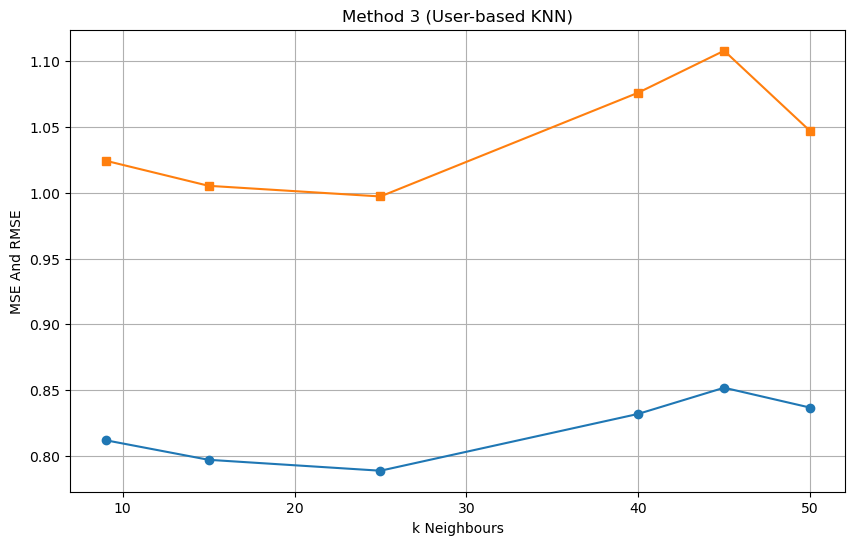

In [26]:
# Method 3 Evaluation 
import matplotlib.pyplot as plt

# Corresponding k for MAE/RMSE
mean_sqaure_errors_3 = [0.8119, 0.7970, 0.7887, 0.8319, 0.8518, 0.8367]
root_mean_square_errors_3 = [1.0244, 1.0053, 0.9972, 1.0761, 1.1080, 1.047]

plt.figure(figsize=(10, 6))
plt.plot(k_neighbour, mean_sqaure_errors_3, marker='o', label='MAE')
plt.plot(k_neighbour, root_mean_square_errors_3, marker='s', label='RMSE')
plt.xlabel('k Neighbours')
plt.ylabel('MSE And RMSE')
plt.title('Method 3 (User-based KNN)')
plt.grid(True)
plt.show()


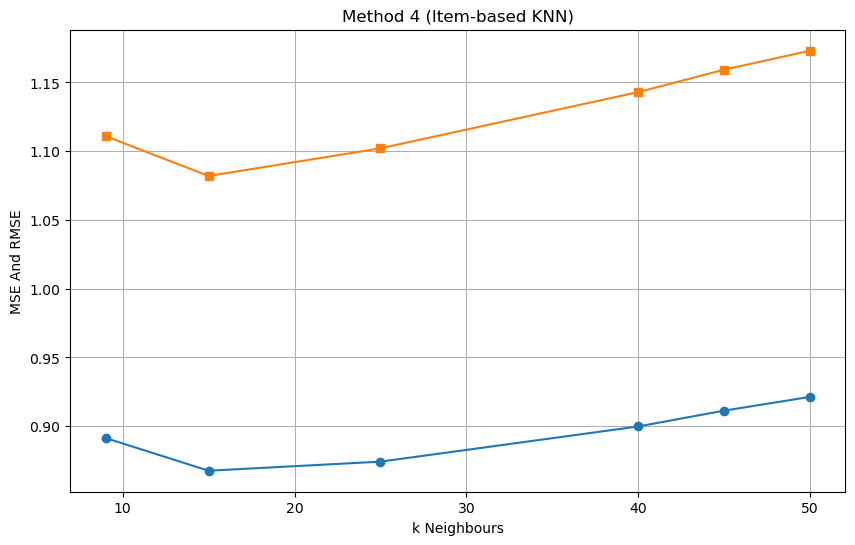

In [27]:
# Method 4 Evaluation 
import matplotlib.pyplot as plt

# Corresponding k for MAE/RMSE 
mean_sqaure_errors_4 = [0.8914, 0.8676, 0.8742, 0.8998, 0.9113, 0.9213]
root_mean_square_errors_4 = [1.111, 1.082, 1.1021, 1.1430, 1.1593, 1.1731]

plt.figure(figsize=(10, 6))
plt.plot(k_neighbour, mean_sqaure_errors_4, marker='o', label='MAE')
plt.plot(k_neighbour, root_mean_square_errors_4, marker='s', label='RMSE')
plt.xlabel('k Neighbours')
plt.ylabel('MSE And RMSE')
plt.title('Method 4 (Item-based KNN)')
plt.grid(True)
plt.show()

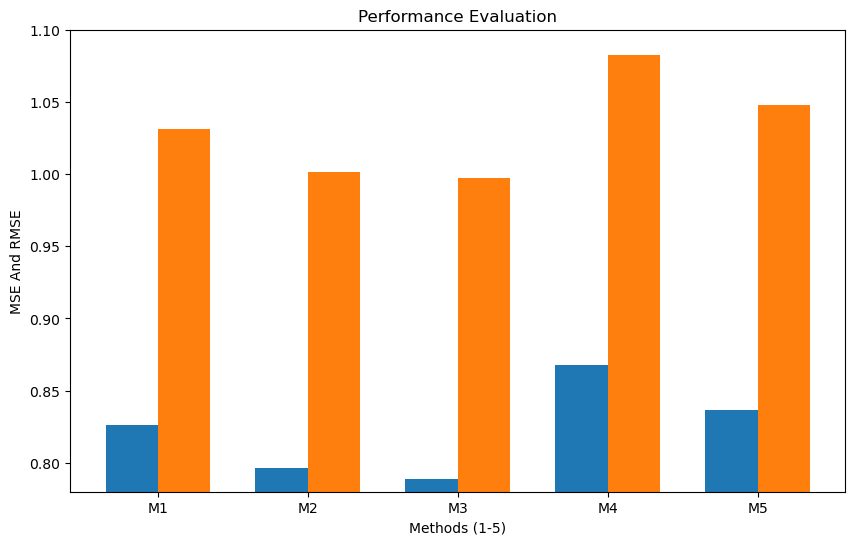

In [28]:
methods = ['M1', 'M2', 'M3', 'M4', 'M5']
MAE_Values = [MAE_solution1, MAE_solution2, MAE_solution3, MAE_solution4, MAE_solution5]
RMSE_Values = [RMSE_solution1, RMSE_solution2, RMSE_solution3, RMSE_solution4, RMSE_solution5]
w = 0.35
method = np.arange(len(methods))
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(methods)) - 0.35/2, MAE_Values, w, label='MAE')
plt.bar(np.arange(len(methods)) + 0.35/2, RMSE_Values, w, label='RMSE')
plt.ylabel('MSE And RMSE')
plt.xlabel('Methods (1-5)')
plt.xticks(method, methods)
plt.title('Performance Evaluation')
plt.ylim(0.78, 1.1)
plt.show()
